In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('kidney.csv')
data.drop('id',axis=1,inplace=True)
data.head(15)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [4]:
#convert to numeric data type from object
data.pcv = pd.to_numeric(data.pcv, errors='coerce')
data.wc = pd.to_numeric(data.wc, errors='coerce')
data.rc = pd.to_numeric(data.rc, errors='coerce')

In [5]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
data[data.age.isnull()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
30,NaN,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,93.0,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
73,NaN,100.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,129.0,...,14.0,6300.0,NaN,yes,no,no,good,yes,yes,ckd
112,NaN,60.0,1.015,3.0,0.0,abnormal,abnormal,notpresent,notpresent,NaN,...,33.0,NaN,NaN,no,no,no,good,no,no,ckd
116,NaN,70.0,1.015,4.0,0.0,abnormal,normal,notpresent,notpresent,104.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
117,NaN,70.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,219.0,...,37.0,9800.0,4.4,no,no,no,good,no,no,ckd
169,NaN,70.0,1.010,0.0,2.0,NaN,normal,notpresent,notpresent,220.0,...,27.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,110.0,...,26.0,9200.0,3.4,yes,yes,no,poor,no,no,ckd
203,NaN,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,207.0,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
268,NaN,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,100.0,...,53.0,8500.0,4.9,no,no,no,good,no,no,notckd


In [7]:
data.classification=data.classification.replace('ckd\t','ckd')
data.dm=data.dm.replace([' yes','\tno','\tyes'],['yes','no','yes'])
data.cad=data.cad.replace('\tno','no')

DATA VISUALIZATION

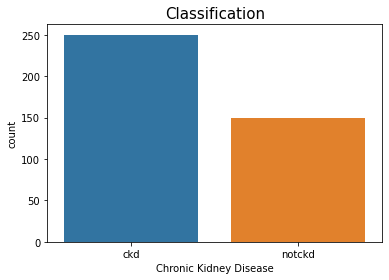

In [8]:
sns.countplot(data.classification)
plt.xlabel('Chronic Kidney Disease')
plt.title("Classification",fontsize=15)
plt.show()

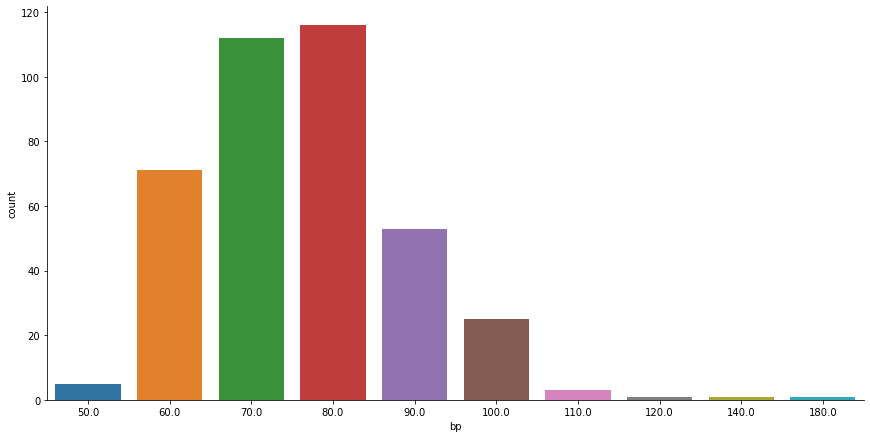

In [9]:
#blood preasure
sns.factorplot(data=data, x='bp', kind= 'count',size=6,aspect=2)

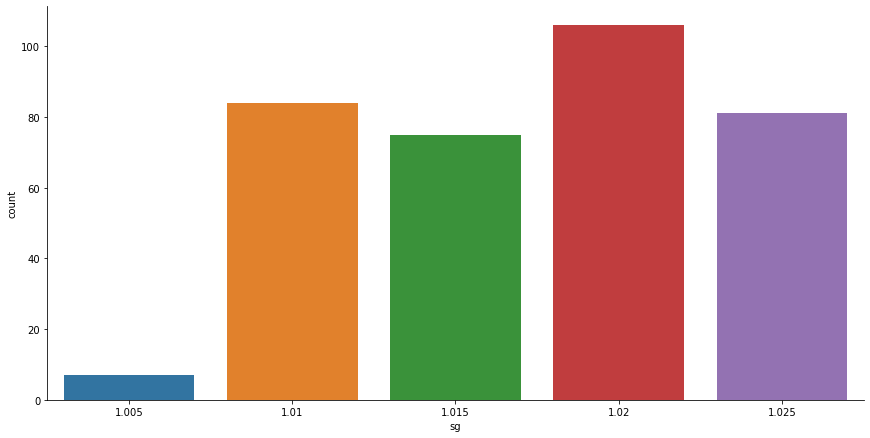

In [10]:
#Specific Gravity
sns.factorplot(data=data, x='sg', kind= 'count',size=6,aspect=2)

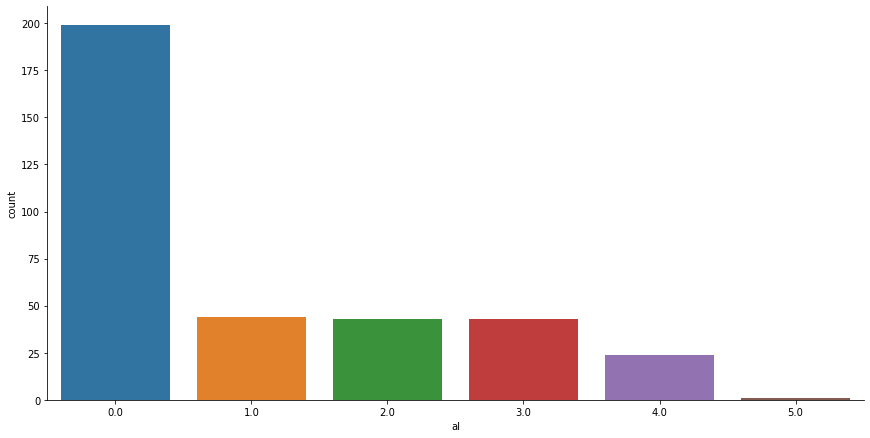

In [11]:
#albumin-frequency graph
sns.factorplot(data=data, x='al', kind= 'count',size=6,aspect=2)

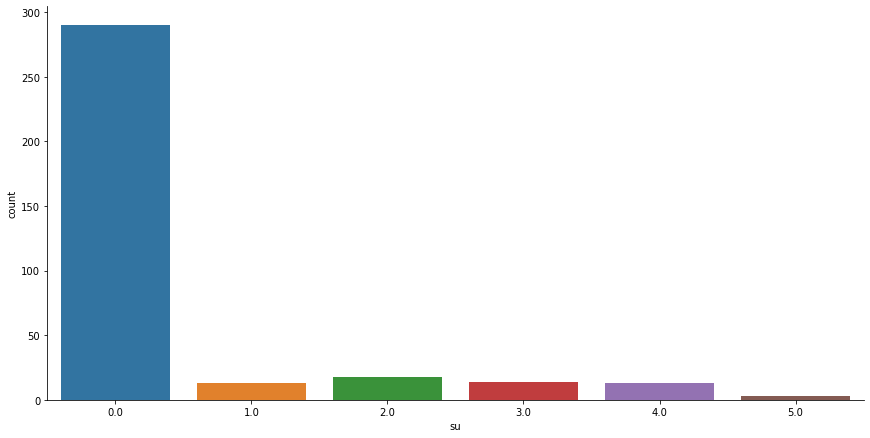

In [12]:
#sugar-frequency graph
sns.factorplot(data=data, x='su', kind= 'count',size=6,aspect=2)

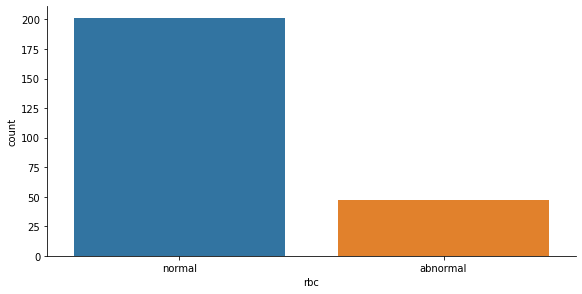

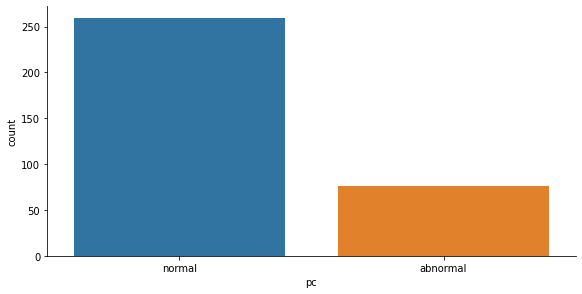

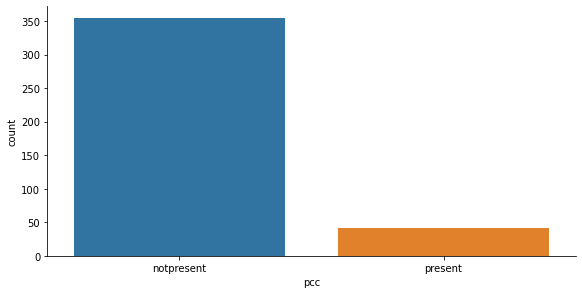

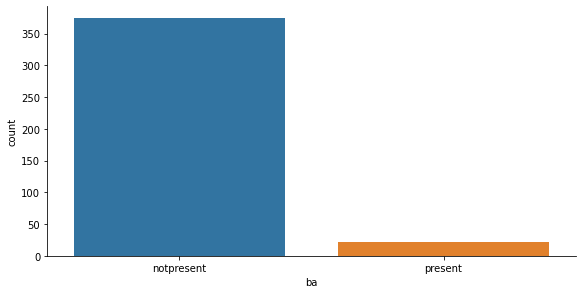

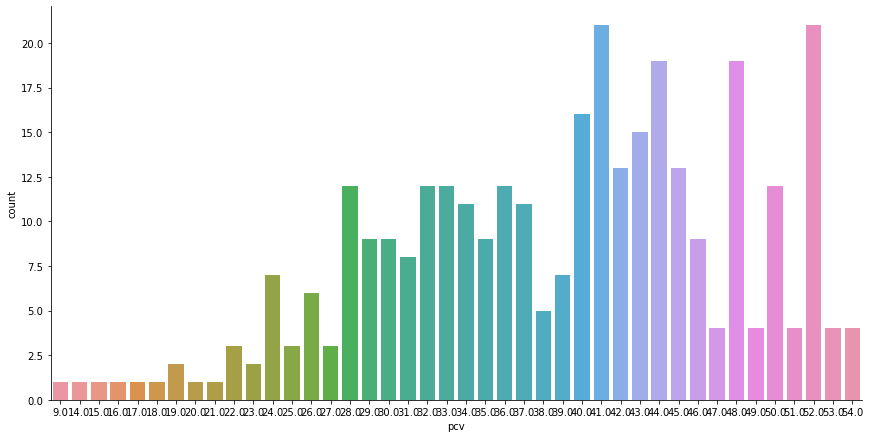

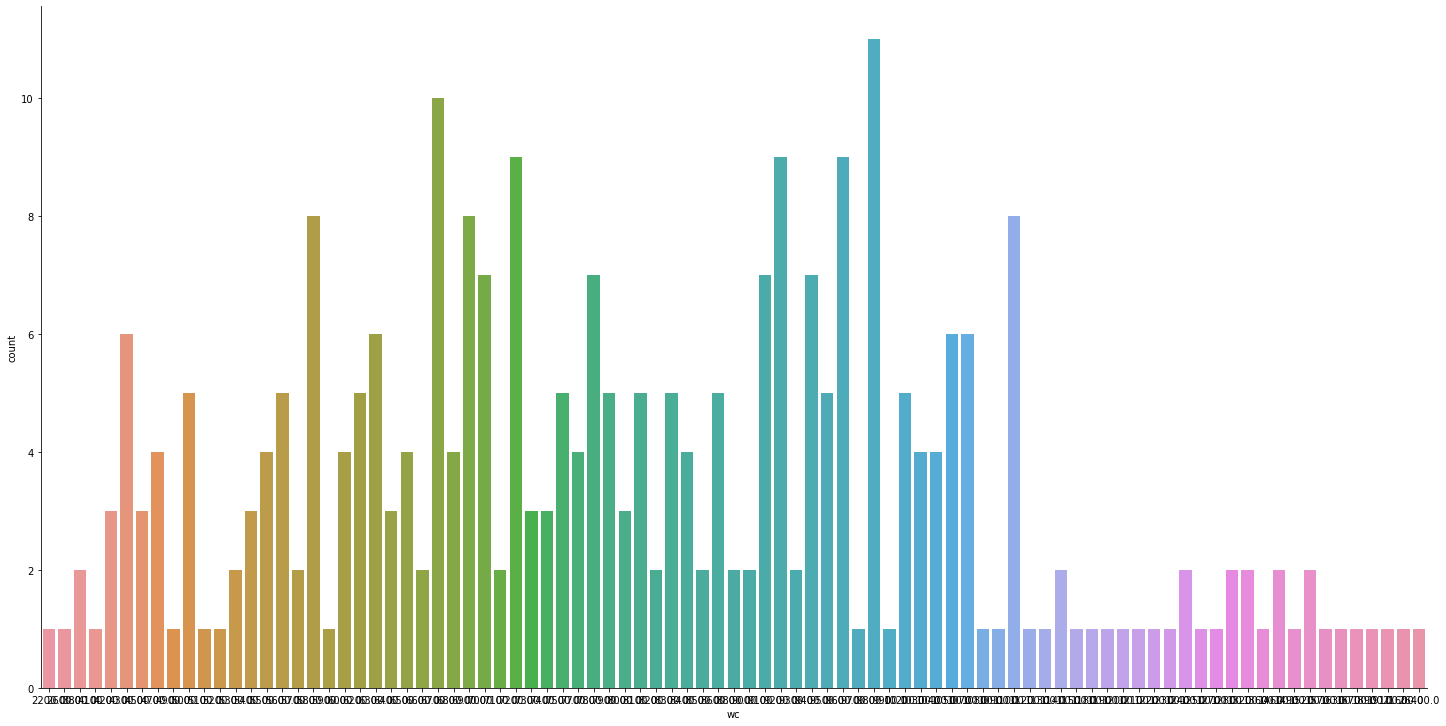

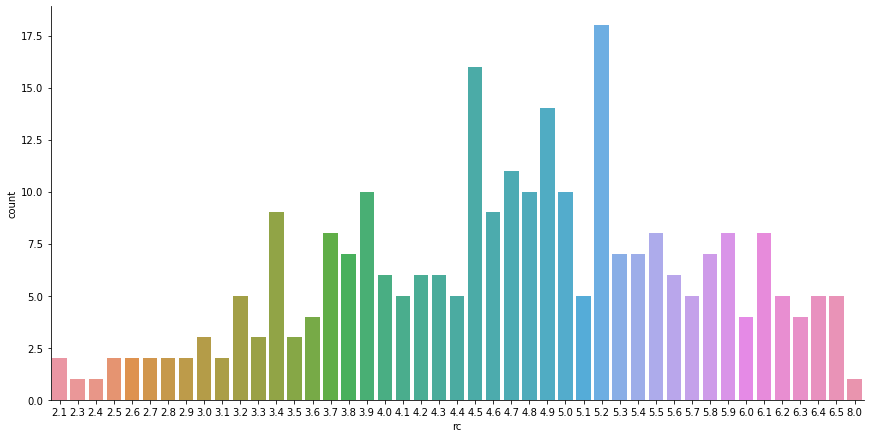

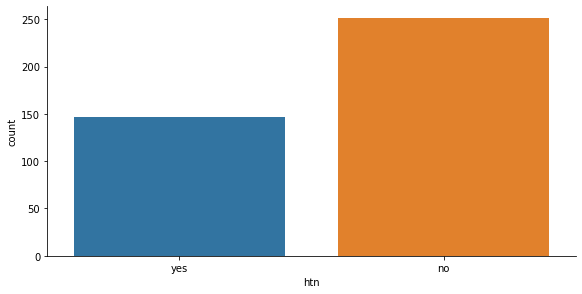

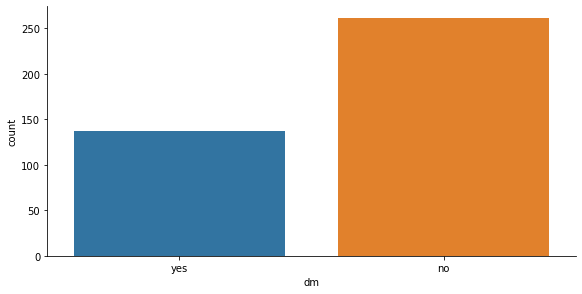

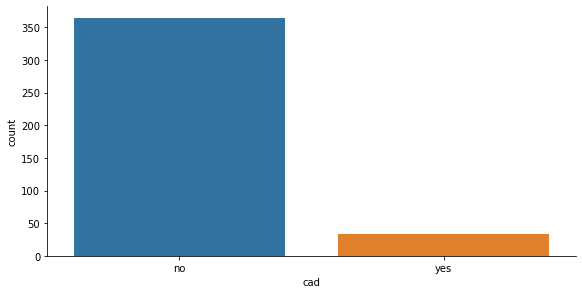

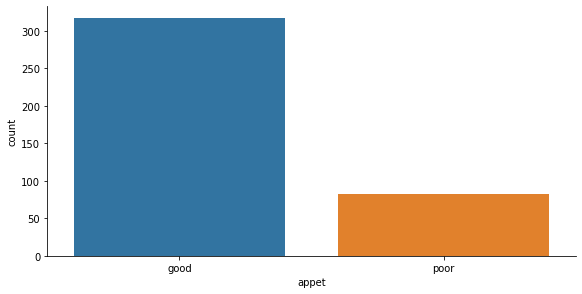

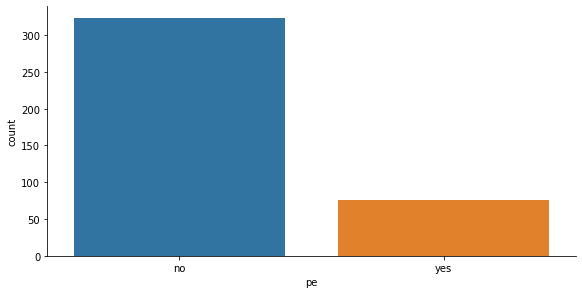

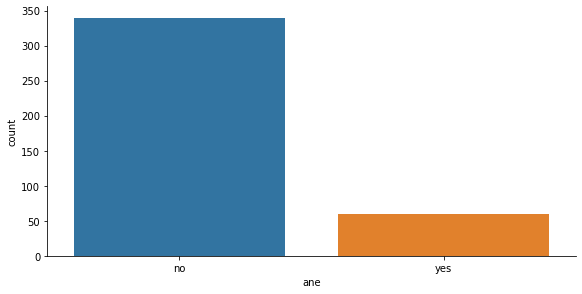

In [13]:
#Check the bar graph of categorical data using factorplot
sns.factorplot(data=data, x='rbc', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='pc', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='pcc', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='ba', kind= 'count',size=4,aspect=2)

sns.factorplot(data=data, x='pcv', kind= 'count',size=6,aspect=2)
sns.factorplot(data=data, x='wc', kind= 'count',size=10,aspect=2)
sns.factorplot(data=data, x='rc', kind= 'count',size=6,aspect=2)

sns.factorplot(data=data, x='htn', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='dm', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='cad', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='appet', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='pe', kind= 'count',size=4,aspect=2)
sns.factorplot(data=data, x='ane', kind= 'count',size=4,aspect=2)

In [14]:
def hist_plot(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Age Distribution with Histogram")
    plt.show()

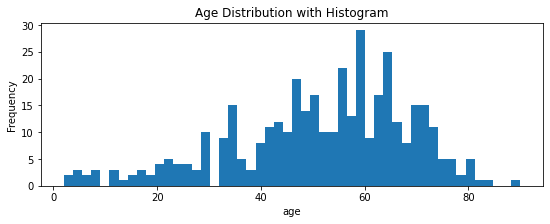

In [15]:
numericVar = ["age"]
for n in numericVar:
    hist_plot(n)

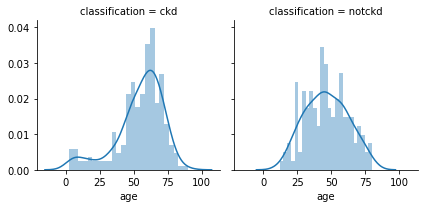

In [16]:
g = sns.FacetGrid(data,col="classification")
g.map(sns.distplot,"age", bins=25)
plt.show()

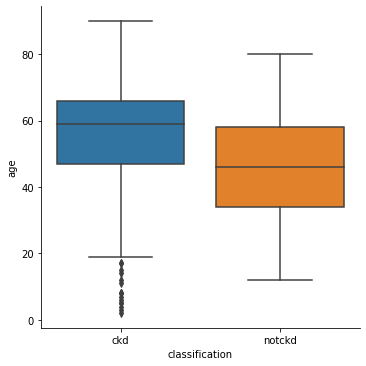

In [17]:
sns.factorplot(x="classification",y="age",data=data,kind="box")
plt.show()

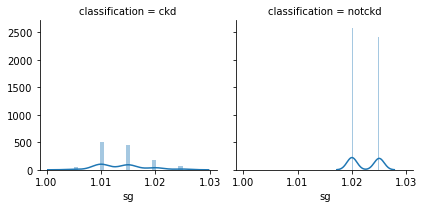

In [18]:
g = sns.FacetGrid(data,col="classification")
g.map(sns.distplot,"sg", bins=25)
plt.show()